In [95]:
import pandas as pd
import seaborn as sns
import plotly.express as px

import folium
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# Load the dataset to understand its structure
data_path = 'NYPD_Shooting_Incident_Data__Historic__20240410.csv'
data = pd.read_csv(data_path)

Clean data

In [51]:
# Dropping rows where JURISDICTION_CODE, Latitude, Longitude, or Lon_Lat have missing values
cleaned_data = data.dropna(subset=['JURISDICTION_CODE', 'Latitude', 'Longitude', 'Lon_Lat'])

# Check the number of remaining missing values in these columns to confirm the operation
remaining_missing = cleaned_data.isnull().sum()

# Convert the 'OCCUR_DATE' to datetime format and extract the year
cleaned_data['OCCUR_DATE'] = pd.to_datetime(cleaned_data['OCCUR_DATE'])
cleaned_data['YEAR'] = cleaned_data['OCCUR_DATE'].dt.year
cleaned_data['OCCUR_TIME'] = pd.to_datetime(cleaned_data['OCCUR_TIME'], format='%H:%M:%S').dt.hour

# Filter out rows containing any of these unrealistic age groups
unrealistic_ages = ['1020', '224', '940', '(null)']
cleaned_data = cleaned_data[~cleaned_data['PERP_AGE_GROUP'].isin(unrealistic_ages)]
cleaned_data = cleaned_data[cleaned_data['VIC_AGE_GROUP'] != '1022']

# Filter out rows without prep and vic race
# cleaned_data = cleaned_data[cleaned_data['PERP_RACE'].isna() == False]
# cleaned_data = cleaned_data[cleaned_data['VIC_RACE'].isna() == False]
# cleaned_data = cleaned_data[cleaned_data['PERP_RACE'] != 'UNKNOWN']
# cleaned_data = cleaned_data[cleaned_data['VIC_RACE'] != 'UNKNOWN)']

# Assuming the column name is confirmed to be 'PERP_SEX'
cleaned_data = cleaned_data[cleaned_data['PERP_SEX'] != '(null)']

/var/folders/x3/5rg2fq097snf05l9glzskh9r0000gn/T/ipykernel_35643/1553244849.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/x3/5rg2fq097snf05l9glzskh9r0000gn/T/ipykernel_35643/1553244849.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/x3/5rg2fq097snf05l9glzskh9r0000gn/T/ipykernel_35643/1553244849.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [42]:
cleaned_data.columns

Index(['INCIDENT_KEY', 'OCCUR_DATE', 'OCCUR_TIME', 'BORO', 'LOC_OF_OCCUR_DESC',
       'PRECINCT', 'JURISDICTION_CODE', 'LOC_CLASSFCTN_DESC', 'LOCATION_DESC',
       'STATISTICAL_MURDER_FLAG', 'PERP_AGE_GROUP', 'PERP_SEX', 'PERP_RACE',
       'VIC_AGE_GROUP', 'VIC_SEX', 'VIC_RACE', 'X_COORD_CD', 'Y_COORD_CD',
       'Latitude', 'Longitude', 'Lon_Lat', 'YEAR'],
      dtype='object')

Shootings in NYC per year

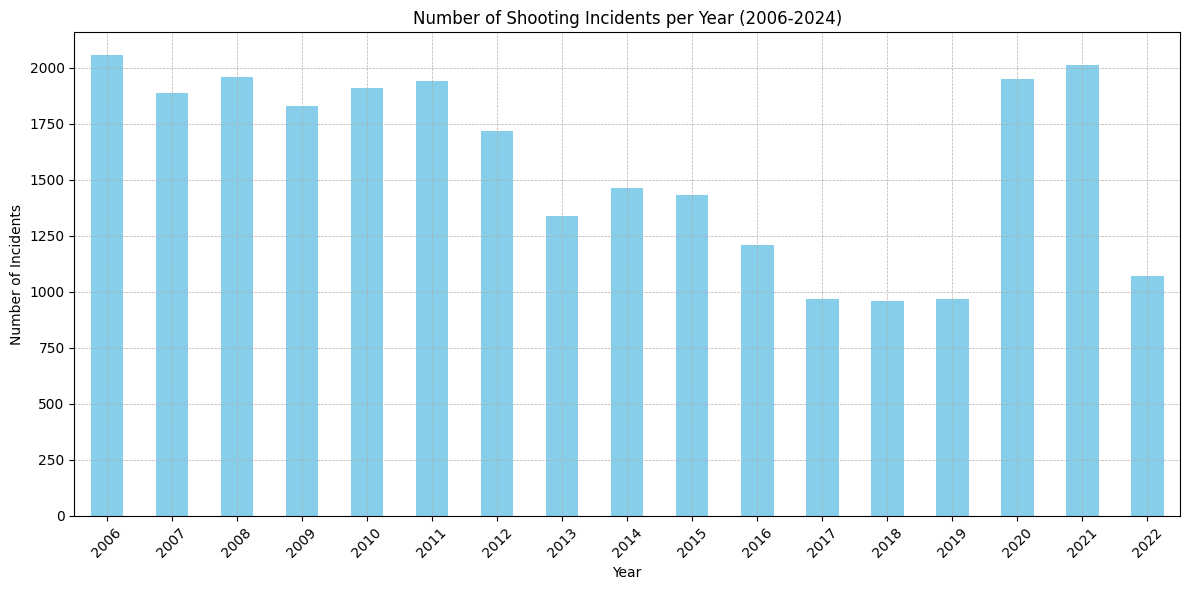

In [52]:


# Group data by year and count incidents
incidents_per_year = cleaned_data['YEAR'].value_counts().sort_index()

# Plotting the data
plt.figure(figsize=(12, 6))
incidents_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Shooting Incidents per Year (2006-2024)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [53]:
# Group data by year and count incidents
incidents_per_year = cleaned_data.groupby('YEAR').size().reset_index(name='Incidents')

# Calculate the trend line
x = incidents_per_year['YEAR']  # Years
y = incidents_per_year['Incidents']  # Incident counts
coefficients = np.polyfit(x, y, 1)
trend_line = np.poly1d(coefficients)

# Create a DataFrame for the trend line
trend_df = pd.DataFrame({
    'YEAR': x,
    'Trend': trend_line(x)
})

# Plotting with Plotly Express
fig = px.bar(incidents_per_year, x='YEAR', y='Incidents', text='Incidents',
             labels={'YEAR': 'Year', 'Incidents': 'Number of Shootings'},
             title='Number of Shooting Incidents in NYC per Year (2006-2024)',
             color_discrete_sequence=['skyblue'])
fig.update_traces(texttemplate='%{text}', textposition='outside', textfont=dict(size=10))
fig.add_scatter(x=trend_df['YEAR'], y=trend_df['Trend'], mode='lines',
                name='Trend Line', line=dict(color='red'))

# Enhance the plot
fig.update_layout(xaxis_tickangle=-45, xaxis_title='Year',
                  yaxis_title='Number of Shootings',
                #   legend_title_text='Prediction of Shootings',
                  margin=dict(l=20, r=20, t=60, b=20),  # Reducing left, right, top, bottom margins
                  legend=dict(
                        title='Prediction of Shootings',
                        orientation='h',  # Horizontal orientation
                        x=0.5,            # Centered horizontally
                        xanchor='center', # Anchor the center to the x position
                        y=-0.3,           # Negative y value to place it below the x-axis
                        yanchor='top'     # Anchor the top of the legend to the y position
                    )
)
fig.show()

Race of Involed

In [82]:
vic_race_yearly_melted

,YEAR,Victim Race,Number of Incidents,Percentage
0,2006,AMERICAN INDIAN/ALASKAN NATIVE,0,0.00
1,2007,AMERICAN INDIAN/ALASKAN NATIVE,1,0.05
2,2008,AMERICAN INDIAN/ALASKAN NATIVE,0,0.00
3,2009,AMERICAN INDIAN/ALASKAN NATIVE,2,0.11
4,2010,AMERICAN INDIAN/ALASKAN NATIVE,1,0.05
...,...,...,...,...
114,2018,WHITE HISPANIC,166,17.33
115,2019,WHITE HISPANIC,166,17.18
116,2020,WHITE HISPANIC,334,17.15
117,2021,WHITE HISPANIC,292,14.52


In [84]:
# Assuming 'cleaned_data' is your DataFrame and already loaded

# Replace 'nan' and any other identifier for unknown data with 'UNKNOWN'
cleaned_data['VIC_RACE'] = cleaned_data['VIC_RACE'].fillna('UNKNOWN').replace(['', ' ', 'N/A'], 'UNKNOWN')

# Group by year and victim race, count the occurrences
vic_race_yearly = cleaned_data.groupby(['YEAR', 'VIC_RACE']).size().unstack(fill_value=0)

# Combine 'UNKNOWN' and any other nan categories into one
vic_race_yearly['UNKNOWN'] = vic_race_yearly.get('UNKNOWN', 0) + vic_race_yearly.get('', 0)

# Calculate total incidents per year
total_incidents_per_year = vic_race_yearly.sum(axis=1)

# Calculate percentages
percentages = vic_race_yearly.divide(total_incidents_per_year, axis=0) * 100

# Melt the DataFrame to use with Plotly Express
vic_race_yearly_melted = vic_race_yearly.reset_index().melt(id_vars='YEAR', var_name='Victim Race', value_name='Number of Incidents')
vic_race_yearly_melted['Percentage'] = percentages.reset_index().melt(id_vars='YEAR')['value'].round(2)

# Plotting the bar chart with hover data showing percentages
fig_vic = px.bar(vic_race_yearly_melted, x='YEAR', y='Number of Incidents', color='Victim Race',
                 title="Victim Race Distribution by Year",
                 labels={'YEAR': 'Year', 'Number of Incidents': 'Number of Incidents'},
                 hover_data={'Number of Incidents': True, 'Percentage': True})


# Update layout
fig_vic.update_layout(
    xaxis_title="Year",
    yaxis_title="Number of Incidents",
    barmode='stack',
    xaxis={'categoryorder':'total descending'},
    legend_title_text='Victim Race'
)

fig_vic.show()

The distridutions remain the same even after the spike

In [90]:
race_on_race

VIC_RACE,AMERICAN INDIAN/ALASKAN NATIVE,ASIAN / PACIFIC ISLANDER,BLACK,BLACK HISPANIC,WHITE,WHITE HISPANIC
PERP_RACE,,,,,,
AMERICAN INDIAN/ALASKAN NATIVE,0,0,2,0,0,0
ASIAN / PACIFIC ISLANDER,0,52,53,13,12,24
BLACK,4,157,9053,803,197,1187
BLACK HISPANIC,0,18,531,344,36,380
WHITE,0,13,37,23,157,52
WHITE HISPANIC,0,36,787,406,97,999


In [94]:
import pandas as pd
import plotly.express as px

# Assuming 'cleaned_data' is your DataFrame and already loaded

# Filter out unknown and nan races for perpetrators and victims
filtered_data = cleaned_data[
    (cleaned_data['PERP_RACE'].notna()) & (cleaned_data['PERP_RACE'] != 'UNKNOWN') &
    (cleaned_data['VIC_RACE'].notna()) & (cleaned_data['VIC_RACE'] != 'UNKNOWN')
]

# Create a crosstab of perpetrator and victim races
# Ensure PERP_RACE are rows and VIC_RACE are columns
race_on_race = pd.crosstab(filtered_data['PERP_RACE'], filtered_data['VIC_RACE'])

# Plotting a density heatmap
fig = px.imshow(
    race_on_race,
    labels=dict(x="Victim Race", y="Perpetrator Race", color="Incident Count"),
    title='Density Heatmap of Race-on-Race Crime',
    aspect='auto'  # Adjust the aspect ratio to auto if needed
)

# Ensure axes labels are correct
fig.update_xaxes(side="bottom", tickmode='array', tickvals=list(range(len(race_on_race.columns))), ticktext=race_on_race.columns)
fig.update_yaxes(tickmode='array', tickvals=list(range(len(race_on_race.index))), ticktext=race_on_race.index)

fig.show()


In [88]:
cleaned_data[['INCIDENT_KEY', 'OCCUR_DATE', 'OCCUR_TIME', 'BORO', 'LOC_OF_OCCUR_DESC',
       'PRECINCT', 'JURISDICTION_CODE', 'LOC_CLASSFCTN_DESC', 'LOCATION_DESC',
       'STATISTICAL_MURDER_FLAG', 'PERP_AGE_GROUP', 'PERP_SEX', 'PERP_RACE',
       'VIC_AGE_GROUP', 'VIC_SEX', 'VIC_RACE', 'YEAR']]

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,YEAR
0,228798151,2021-05-27,21,QUEENS,NaN,105,0.0,NaN,NaN,False,NaN,NaN,UNKNOWN,18-24,M,BLACK,2021
1,137471050,2014-06-27,17,BRONX,NaN,40,0.0,NaN,NaN,False,NaN,NaN,UNKNOWN,18-24,M,BLACK,2014
2,147998800,2015-11-21,3,QUEENS,NaN,108,0.0,NaN,NaN,True,NaN,NaN,UNKNOWN,25-44,M,WHITE,2015
3,146837977,2015-10-09,18,BRONX,NaN,44,0.0,NaN,NaN,False,NaN,NaN,UNKNOWN,<18,M,WHITE HISPANIC,2015
4,58921844,2009-02-19,22,BRONX,NaN,47,0.0,NaN,NaN,True,25-44,M,BLACK,45-64,M,BLACK,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27306,245173597,2022-05-16,16,BRONX,OUTSIDE,41,0.0,STREET,BEAUTY/NAIL SALON,True,18-24,M,BLACK,<18,F,WHITE HISPANIC,2022
27308,239583450,2022-01-22,13,MANHATTAN,OUTSIDE,30,0.0,STREET,(null),False,25-44,F,WHITE HISPANIC,25-44,M,WHITE HISPANIC,2022
27309,246825728,2022-06-18,3,MANHATTAN,OUTSIDE,32,0.0,STREET,(null),False,18-24,M,BLACK,25-44,M,BLACK,2022
27310,246876579,2022-06-19,20,BRONX,INSIDE,46,2.0,HOUSING,MULTI DWELL - PUBLIC HOUS,False,25-44,M,BLACK,25-44,M,WHITE HISPANIC,2022


In [39]:
cleaned_data[['PERP_RACE', 'VIC_RACE']]

,PERP_RACE,VIC_RACE
0,NaN,BLACK
1,NaN,BLACK
2,NaN,WHITE
3,NaN,WHITE HISPANIC
4,BLACK,BLACK
...,...,...
27306,BLACK,WHITE HISPANIC
27308,WHITE HISPANIC,WHITE HISPANIC
27309,BLACK,BLACK
27310,BLACK,WHITE HISPANIC
